In [172]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set background colors
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'})

# Make gridlines thinner and lighter
plt.rc('grid', linewidth=0.2, color='lightgray')

# Set text color to white (axes labels, tick labels, and titles)
plt.rc('axes', labelcolor='white', titlesize=16, titleweight='bold', titlecolor='white')
plt.rc('xtick', color='white')
plt.rc('ytick', color='white')
plt.rc('legend', facecolor='black', edgecolor='white')

#setting the matplotlib theme
# plt.style.use('seaborn-v0_8-dark')

## PART - 1

### Initial Dataset overview

- Load the dataset and display the first few rows to get an initial look at the data.

- Categorize the Variables: Identify the name and type (continuous or categorical) for each variable in the dataset.
    
    - List the number of unique values for each variable. This will help you determine whether a variable should be treated as categorical or continuous.

- Provide a brief summary of the dataset’s structure and variable types.


In [173]:
#load the dataset
df = pd.read_csv('./data/titanic.csv')

#display the first few rows as table 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [174]:
#categorize the variables
print("Information about the dataset:")
print("---"*20)
df.info()

#list the number of unique values for each variable
print("\n\nNo of Unique Values for each variable:")
print("---"*20)
df.nunique()


Information about the dataset:
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


No of Unique Values for each variable:
------------------------------------------------------------


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [175]:
# print the column names
print(f"Column names: {df.columns}\n\n")

#provide a brief summary of the dataset's structure and variable types
print("Summary of the dataset:")
print("---"*20)
df.describe()

Column names: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Summary of the dataset:
------------------------------------------------------------


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## PART - 2

### Univariate Analysis

- Conduct univariate EDA on all variables. For each variable:

- Descriptive Statistics:
    
    - For continuous variables, provide summary statistics (mean, median, standard deviation, etc.).
    - For categorical variables, provide frequency counts of unique values.

- Visualizations:

    - Use histograms or box plots for continuous variables.
    - Use bar plots or count plots for categorical variables.

- Interpretation:

    - Interpret the descriptive statistics and visualizations:
        - What do you observe in terms of distribution, central tendency, or spread?
        - Identify any potential issues, such as outliers, missing values, or skewness.

In [176]:
# continous and categorical variables
continuous_vars = ['Age', 'Fare']
categorical_vars = ['Survived', 'Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']

print(f"Continuous variables: {continuous_vars}")
print(f"Categorical variables: {categorical_vars}")


Continuous variables: ['Age', 'Fare']
Categorical variables: ['Survived', 'Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']


### Descriptive Statistics

In [177]:
# descriptive statistics for continuous variables
df[continuous_vars].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [178]:
# frequency counts for categorical variables excluding the name column
df[categorical_vars].value_counts()

Survived  Pclass  Sex     Embarked  SibSp  Parch
0         3       male    S         0      0        177
          2       male    S         0      0         61
          1       male    S         0      0         35
          3       male    C         0      0         28
                          Q         0      0         27
                                                   ... 
                  female  S         1      6          1
                                           5          1
                                           4          1
                                           3          1
1         3       male    S         4      2          1
Name: count, Length: 160, dtype: int64

### Visualitzations

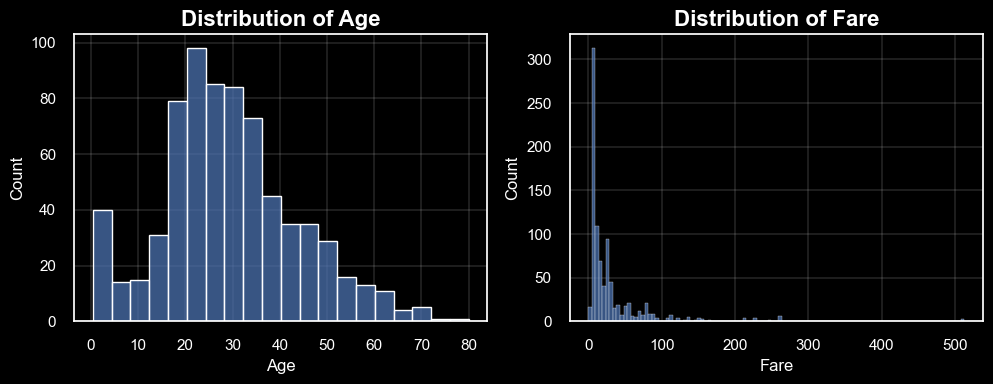

              Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


In [181]:
# visualizations for continuous variables

n = len(continuous_vars)
n_cols = 4
n_rows = (n + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(continuous_vars):
    sns.histplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print(df[continuous_vars].describe())

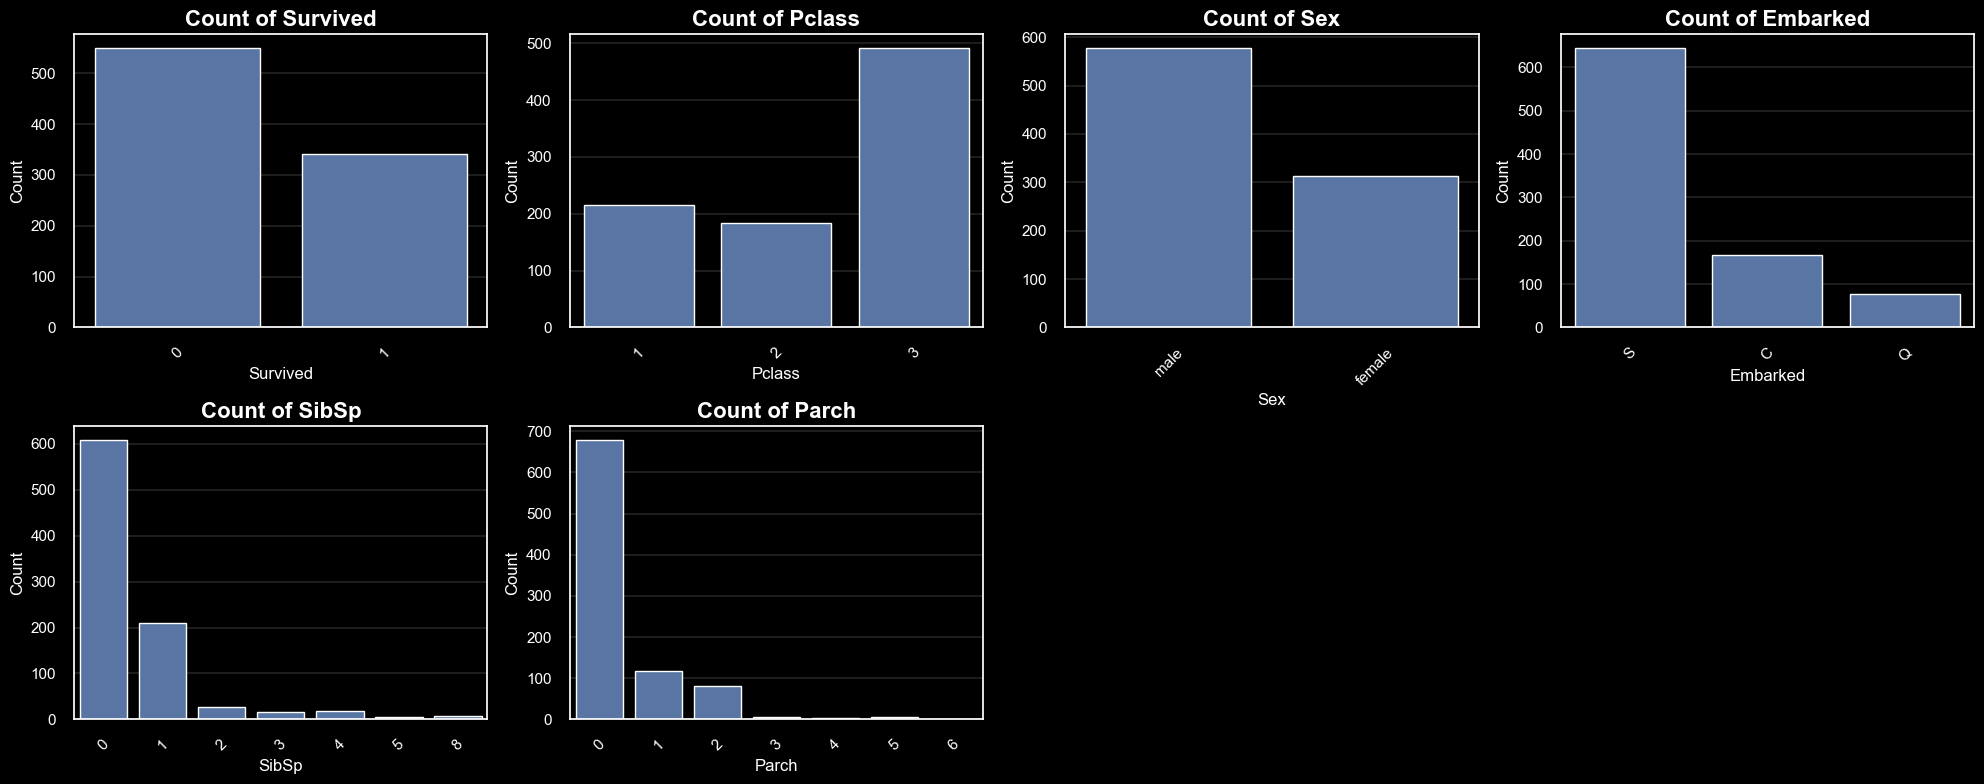

         Survived      Pclass       SibSp       Parch
count  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642    0.523008    0.381594
std      0.486592    0.836071    1.102743    0.806057
min      0.000000    1.000000    0.000000    0.000000
25%      0.000000    2.000000    0.000000    0.000000
50%      0.000000    3.000000    0.000000    0.000000
75%      1.000000    3.000000    1.000000    0.000000
max      1.000000    3.000000    8.000000    6.000000


In [182]:
# bar plots for categorical variables

n = len(categorical_vars)
n_cols = 4
n_rows = (n + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_vars):
    
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', labelrotation=45)

    if col == 'Name' or col == 'Ticket' or col == 'Cabin':
        continue
    sns.countplot(data=df, x=col, ax=axes[i])
    
# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print(df[categorical_vars].describe())

## Interpretation of Descriptive Statistics and Visualizations

### Continuous Variables

- **Age**
  - Some age values are missing.
  - The distribution is **right-skewed** (more young passengers, fewer older).
  - Potential outliers present at very young and very old ages.

- **Fare**
  - The distribution is **strongly right-skewed**.
  - Most fares are low, but a few outliers exist with values exceeding 500.
  - Indicates most passengers paid low fares, but some paid much higher prices.

---

### Categorical Variables

- **Survived**
  - Binary distribution with more 0s (did not survive) than 1s.
  - No missing values.

- **Pclass**
  - **Left-skewed**: the majority of passengers were in 3rd class.

- **SibSp**
  - **Right-skewed**: most passengers have 0 siblings/spouses aboard; few have higher numbers.

- **Parch**
  - **Right-skewed**: most passengers have 0 parents/children aboard; higher values are rare.

- **Embarked**
  - Most passengers embarked from port 'S'.
  - A small number of missing values.

- **Sex**
  - Categorical with two categories (male, female).
  - No skewness or missing values.

# Part - 3

## Bivariate Analysis

- Explore relationships between pairs of variables. Choose at least four pairs of variables that you find interesting and perform bivariate analysis:
    
    - At least two pairs should involve a continuous variable and a categorical variable (e.g., Age vs Survived, Fare vs Pclass).
    - At least two pairs should involve categorical variables (e.g., Sex vs Survived, Pclass vs Survived).


- For each pair:
    
    - **Visualizations:**
        
        - Use appropriate visualizations such as box plots, bar plots, scatter plots, or violin plots.

    - **Descriptive Statistics:**
        
        - Use groupby or pivot tables to explore relationships between the variables.

    - **Interpretation:**

        - What do you observe in terms of relationships between variables? Are there any trends or patterns?

        - Mention any potential data issues that might affect the relationships (e.g., outliers, missing values, or non-normal distributions).

---

### **Fare vs Embarked**  
  *Exploring how ticket prices differ by port of embarkation—does location affect what people paid?*

### **Age vs Sex
  *Comparing the age distribution between males and females—are there more young or old in each gender?*

### Survived vs Pclass
  *Analyzing how passenger class is related to survival rate—did wealthier classes survive more?*

- **Survived vs Embarked**  
  *Investigating which boarding location was associated with a higher survival rate—did some regions have more survivors?*

- **Survived vs SibSp**  
  *Examining whether traveling alone or with family/spouse affected survival—did more single travelers perish?*
